## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


## Load Dataset(s)

In [ ]:
# loading the December 2022 Tweets into dec_tweets

dec_df = pd.read_csv('HogwartsLegacy_Dec.csv')
dec_df.shape

In [ ]:
# quick look at dec_df

dec_df.head(10)

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,username,followers_count,verified,tweet
0,4730266112,2022-12-31 23:57:19+00:00,,1609337940689440771,en,1,0,0,0,jaysonj_247,81,False,@SgtGreyBeard @TheDivisionGame @assassinscreed...
1,1579169806036586496,2022-12-31 23:54:31+00:00,,1609337235152994305,en,0,0,0,0,FerocityYang,0,False,@HogwartsLegacy \nGot two questions in one for...
2,210004082,2022-12-31 23:53:08+00:00,,1609336887935746048,en,2,0,0,0,GustavoAValero,199,False,Happy #HogwartsLegacy Year!\n🥂🧙‍♂️🍾🎉 https://t...
3,880210269011673094,2022-12-31 23:45:40+00:00,,1609335009466359808,en,0,0,0,0,valiantthor8,13,False,@DazDobson @SgtGreyBeard @TheDivisionGame @ass...
4,1503101474922020872,2022-12-31 23:31:06+00:00,,1609331340301697026,en,2,0,1,0,ChemaneZolani,0,False,@SgtGreyBeard @TheDivisionGame @assassinscreed...
5,1280931428935569410,2022-12-31 23:30:02+00:00,,1609331072659083265,en,1,0,1,0,Raiders96PL,55,False,@LaCharlz @HogwartsLegacy @HogLegNews @Xpecto_...
6,362064459,2022-12-31 23:29:40+00:00,,1609330980124332035,en,1,0,0,0,SavagedBagel,25,False,@SgtGreyBeard @TheDivisionGame @assassinscreed...
7,248366084,2022-12-31 23:27:39+00:00,,1609330474702217218,en,1,0,1,0,LaCharlz,41,False,@Raiders96PL @HogwartsLegacy @HogLegNews @Xpec...
8,1501832755331620864,2022-12-31 23:12:32+00:00,,1609326667880714240,en,592,7,10,62,HogLegacy_ES,5408,False,NEXT MONTH. #HogwartsLegacy
9,1439269658046210049,2022-12-31 23:10:44+00:00,,1609326214660988929,en,0,0,0,0,Lostinthevoid09,5,False,@HogwartsLegacy_ https://t.co/lgYvsLKked can s...


In [ ]:
# loading the February Tweets into feb_tweets

feb_df = pd.read_csv('HogwartsLegacy_Feb.csv')
feb_df.shape

(1008, 13)

In [ ]:
# quick look at feb_df

feb_df.tail(10)

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,username,followers_count,verified,tweet
998,1.36623E+18,2023-02-10 22:45:28+00:00,,1.62418E+18,en,0,0,0,0,KiiiDshy,54,FALSE,@HogwartsLegacy Done
999,1.59567E+18,2023-02-10 22:45:23+00:00,012bfce967f2125f,1.62418E+18,en,0,0,0,0,SoItShallUnfold,4,FALSE,This man was supposed to tutor me and then tak...
1000,7.55391E+17,2023-02-10 22:45:13+00:00,,1.62418E+18,en,0,0,1,0,Blazed_Kakashi,54,FALSE,@IbSlytherin @ScarletNatanya @HogwartsLegacy @...
1001,52790915,2023-02-10 22:45:09+00:00,,1.62418E+18,en,29,0,1,20,Alledrian_Hoops,739,FALSE,"#PS5Share, #HogwartsLegacy D A M N ... #Wizard..."
1002,1.62379E+18,2023-02-10 22:45:05+00:00,,1.62418E+18,en,35,0,1,0,dookiebums,2,FALSE,@HeroMode @HogwartsLegacy you should totally a...
1003,1.22311E+18,2023-02-10 22:45:03+00:00,,1.62418E+18,en,3,0,0,0,Milkdud04809240,921,FALSE,★Twitch Drops Enabled!★ You're a WIZARD\n\n@Ho...
1004,2188714462,2023-02-10 22:45:00+00:00,,1.62418E+18,en,4,0,0,0,PlayGamesMovies,109981,FALSE,Harry Potter \nThe Complete 8-Film Collection\...
1005,1.5014E+18,2023-02-10 22:44:58+00:00,,1.62418E+18,en,0,0,0,0,fulltimegame22,23,FALSE,Hogwarts Legacy PS5 DualSense Controller Sells...
1006,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,username,followers_count,verified,tweet
1007,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,username,followers_count,verified,tweet


## Preprocessing Data Frames

In [ ]:
dec_df.columns

Index(['author id', 'created_at', 'geo', 'id', 'lang', 'like_count',
       'quote_count', 'reply_count', 'retweet_count', 'username',
       'followers_count', 'verified', 'tweet'],
      dtype='object')

In [ ]:
# dropping all the columns except tweet column

dec_tweets = dec_df.loc[:, ~dec_df.columns.isin(['author id', 'created_at', 'geo', 'id', 'lang', 'like_count',
                                               'quote_count', 'reply_count', 'retweet_count',
                                                'username', 'followers_count', 'verified'])]
dec_tweets

,tweet
0,@SgtGreyBeard @TheDivisionGame @assassinscreed...
1,@HogwartsLegacy \nGot two questions in one for...
2,Happy #HogwartsLegacy Year!\n🥂🧙‍♂️🍾🎉 https://t...
3,@DazDobson @SgtGreyBeard @TheDivisionGame @ass...
4,@SgtGreyBeard @TheDivisionGame @assassinscreed...
...,...
1004,This'll be a great game. https://t.co/UfpKXkvrhB
1005,@jhampton_ @SionnachRealtra @HogwartsLegacy_ I...
1006,@jhampton_ @Blee669 @Rjpeer @HogwartsLegacy_ h...
1007,COVID through times of hog warts legacy 😎\n#Ho...


In [ ]:
# for the Feb df we must first drop the last two rows

feb_df = feb_df[:-2]

feb_df.tail(5)

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,username,followers_count,verified,tweet
1001,52790915,2023-02-10 22:45:09+00:00,,1.62418E+18,en,29,0,1,20,Alledrian_Hoops,739,FALSE,"#PS5Share, #HogwartsLegacy D A M N ... #Wizard..."
1002,1.62379E+18,2023-02-10 22:45:05+00:00,,1.62418E+18,en,35,0,1,0,dookiebums,2,FALSE,@HeroMode @HogwartsLegacy you should totally a...
1003,1.22311E+18,2023-02-10 22:45:03+00:00,,1.62418E+18,en,3,0,0,0,Milkdud04809240,921,FALSE,★Twitch Drops Enabled!★ You're a WIZARD\n\n@Ho...
1004,2188714462,2023-02-10 22:45:00+00:00,,1.62418E+18,en,4,0,0,0,PlayGamesMovies,109981,FALSE,Harry Potter \nThe Complete 8-Film Collection\...
1005,1.5014E+18,2023-02-10 22:44:58+00:00,,1.62418E+18,en,0,0,0,0,fulltimegame22,23,FALSE,Hogwarts Legacy PS5 DualSense Controller Sells...


In [ ]:
feb_tweets = feb_df.loc[:, ~feb_df.columns.isin(['author id', 'created_at', 'geo', 'id', 'lang', 'like_count',
                                               'quote_count', 'reply_count', 'retweet_count',
                                                'username', 'followers_count', 'verified'])]
feb_tweets

,tweet
0,I have a broom! Continuing the playthrough of ...
1,@HogwartsLegacy its pissing me off that despit...
2,@HogwartsLegacy @Twitch Thank you for respecti...
3,Seeing these media sites are attacking people ...
4,@FredoInDaCut__ @comp_kiwi @RG_Hokkaido @Hogwa...
...,...
1001,"#PS5Share, #HogwartsLegacy D A M N ... #Wizard..."
1002,@HeroMode @HogwartsLegacy you should totally a...
1003,★Twitch Drops Enabled!★ You're a WIZARD\n\n@Ho...
1004,Harry Potter \nThe Complete 8-Film Collection\...


In [ ]:
# checking for any missing values in dec_tweets

dec_tweets.isna().sum()

tweet    0
dtype: int64

In [ ]:
# checking for any missing values in feb_tweets

feb_tweets.isna().sum()

tweet    0
dtype: int64

## Vader Sentiment

In [ ]:
# running Vader sentiment on dec_tweets

dec_tweets['neg'] = dec_tweets['tweet'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
dec_tweets['neu'] = dec_tweets['tweet'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
dec_tweets['pos'] = dec_tweets['tweet'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
dec_tweets['compound'] = dec_tweets['tweet'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
dec_tweets

/var/folders/39/18sb29v55f172v54pn1ybyfw0000gn/T/ipykernel_969/3187463663.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dec_tweets['neg'] = dec_tweets['tweet'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
/var/folders/39/18sb29v55f172v54pn1ybyfw0000gn/T/ipykernel_969/3187463663.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dec_tweets['neu'] = dec_tweets['tweet'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
/var/folders/39/18sb29v55f172v54pn1ybyfw0000gn/T/ipykernel_969/3187463663.py:5

,tweet,neg,neu,pos,compound
0,@SgtGreyBeard @TheDivisionGame @assassinscreed...,0.000,0.664,0.336,0.7964
1,@HogwartsLegacy \nGot two questions in one for...,0.054,0.836,0.110,0.3167
2,Happy #HogwartsLegacy Year!\n🥂🧙‍♂️🍾🎉 https://t...,0.000,0.501,0.499,0.6114
3,@DazDobson @SgtGreyBeard @TheDivisionGame @ass...,0.000,1.000,0.000,0.0000
4,@SgtGreyBeard @TheDivisionGame @assassinscreed...,0.000,0.749,0.251,0.8934
...,...,...,...,...,...
1004,This'll be a great game. https://t.co/UfpKXkvrhB,0.000,0.494,0.506,0.6249
1005,@jhampton_ @SionnachRealtra @HogwartsLegacy_ I...,0.000,0.721,0.279,0.7088
1006,@jhampton_ @Blee669 @Rjpeer @HogwartsLegacy_ h...,0.000,1.000,0.000,0.0000
1007,COVID through times of hog warts legacy 😎\n#Ho...,0.000,1.000,0.000,0.0000


In [ ]:
# running Vader sentiment on feb_tweets

feb_tweets['neg'] = feb_tweets['tweet'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
feb_tweets['neu'] = feb_tweets['tweet'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
feb_tweets['pos'] = feb_tweets['tweet'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
feb_tweets['compound'] = feb_tweets['tweet'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
feb_tweets

/var/folders/39/18sb29v55f172v54pn1ybyfw0000gn/T/ipykernel_969/3752328765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feb_tweets['neg'] = feb_tweets['tweet'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
/var/folders/39/18sb29v55f172v54pn1ybyfw0000gn/T/ipykernel_969/3752328765.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feb_tweets['neu'] = feb_tweets['tweet'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
/var/folders/39/18sb29v55f172v54pn1ybyfw0000gn/T/ipykernel_969/3752328765.py:5

,tweet,neg,neu,pos,compound
0,I have a broom! Continuing the playthrough of ...,0.000,1.000,0.000,0.0000
1,@HogwartsLegacy its pissing me off that despit...,0.154,0.795,0.051,-0.6740
2,@HogwartsLegacy @Twitch Thank you for respecti...,0.000,0.703,0.297,0.9349
3,Seeing these media sites are attacking people ...,0.176,0.639,0.184,-0.1779
4,@FredoInDaCut__ @comp_kiwi @RG_Hokkaido @Hogwa...,0.000,0.644,0.356,0.8908
...,...,...,...,...,...
1001,"#PS5Share, #HogwartsLegacy D A M N ... #Wizard...",0.000,1.000,0.000,0.0000
1002,@HeroMode @HogwartsLegacy you should totally a...,0.000,0.848,0.152,0.3612
1003,★Twitch Drops Enabled!★ You're a WIZARD\n\n@Ho...,0.000,1.000,0.000,0.0000
1004,Harry Potter \nThe Complete 8-Film Collection\...,0.000,1.000,0.000,0.0000


## Analyzing The Results

In [ ]:
dec_tweets.describe()

,neg,neu,pos,compound
count,1009.000000,1009.000000,1009.000000,1009.000000
mean,0.037472,0.834164,0.128367,0.230139
std,0.081595,0.154445,0.141336,0.400572
min,0.000000,0.204000,0.000000,-0.954500
25%,0.000000,0.723000,0.000000,0.000000
50%,0.000000,0.848000,0.106000,0.192600
75%,0.031000,1.000000,0.215000,0.571900
max,0.549000,1.000000,0.796000,0.968300


In [ ]:
feb_tweets.describe()

,neg,neu,pos,compound
count,1006.000000,1006.000000,1006.000000,1006.000000
mean,0.057811,0.822858,0.119338,0.134452
std,0.098182,0.156156,0.139596,0.445042
min,0.000000,0.270000,0.000000,-0.965600
25%,0.000000,0.715250,0.000000,0.000000
50%,0.000000,0.830000,0.080000,0.000000
75%,0.096000,1.000000,0.209750,0.476375
max,0.594000,1.000000,0.730000,0.969100


### Counting the # of pos, neg, & neu tweets in dec_tweets

In [ ]:
def pos_twt_count_dec():
    total_pos_dec = 0
    for i in dec_tweets['compound']:
        if i > 0:
            total_pos_dec += 1
    print('total count of positive tweets: ' + str(total_pos_dec))
pos_twt_count_dec()


def neg_twt_count_dec():
    total_neg_dec = 0
    for i in dec_tweets['compound']:
        if i < 0:
            total_neg_dec += 1
    print('total count of negative tweets: ' + str(total_neg_dec))
neg_twt_count_dec()

def neu_twt_count_dec():
    total_neu_dec = 0
    for i in dec_tweets['compound']:
        if i == 0:
            total_neu_dec += 1
    print('total count of neutral tweets: ' + str(total_neu_dec))
neu_twt_count_dec()

total count of positive tweets: 534
total count of negative tweets: 135
total count of neutral tweets: 340


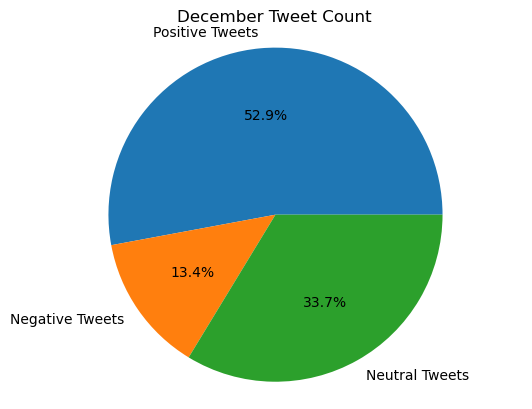

In [ ]:
twt_count = [534, 135, 340]
my_labels = 'Positive Tweets', 'Negative Tweets', 'Neutral Tweets'
plt.pie(twt_count, labels=my_labels, autopct='%1.1f%%')
plt.title('December Tweet Count')
plt.axis('equal')
plt.show()

### Counting the # of pos, neg, & neu tweets in feb_tweets

In [ ]:
def pos_twt_count_feb():
    total_pos_feb = 0
    for i in feb_tweets['compound']:
        if i > 0:
            total_pos_feb += 1
    print('total count of positive tweets: ' + str(total_pos_feb))
pos_twt_count_feb()


def neg_twt_count_feb():
    total_neg_feb = 0
    for i in feb_tweets['compound']:
        if i < 0:
            total_neg_feb += 1
    print('total count of negative tweets: ' + str(total_neg_feb))
neg_twt_count_feb()

def neu_twt_count_feb():
    total_neu_feb = 0
    for i in feb_tweets['compound']:
        if i == 0:
            total_neu_feb += 1
    print('total count of neutral tweets: ' + str(total_neu_feb))
neu_twt_count_feb()

total count of positive tweets: 458
total count of negative tweets: 244
total count of neutral tweets: 304


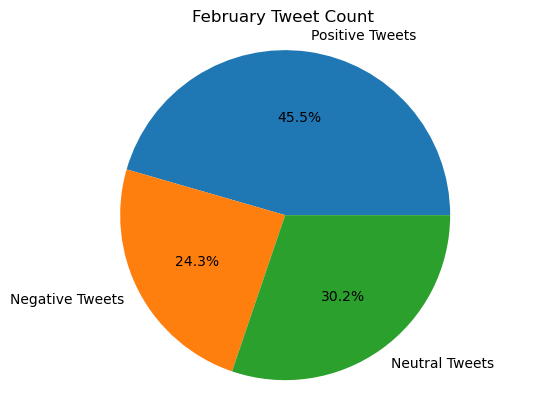

In [ ]:
twt_count = [458, 244, 304]
my_labels = 'Positive Tweets', 'Negative Tweets', 'Neutral Tweets'
plt.pie(twt_count, labels=my_labels, autopct='%1.1f%%')
plt.title('February Tweet Count')
plt.axis('equal')
plt.show()

### Negative Tweets from Feb Related to JK Rowling or Trans Issues

In [ ]:
# First make a new df conatian all negative rated Feb Tweets

neg_feb_twts = feb_tweets[feb_tweets['compound'] < 0]
neg_feb_twts


,tweet,neg,neu,pos,compound
1,@HogwartsLegacy its pissing me off that despit...,0.154,0.795,0.051,-0.6740
3,Seeing these media sites are attacking people ...,0.176,0.639,0.184,-0.1779
8,@hokiepokeu @Pocketsneak79 @KanyeYe2024 @Hogwa...,0.289,0.604,0.108,-0.5096
12,@TheEuropeanLad @HogwartsLegacy W m tryna buy ...,0.167,0.833,0.000,-0.1027
16,This game has no business being this beautiful...,0.196,0.804,0.000,-0.2960
...,...,...,...,...,...
975,@CorentinChz @WBGamesSupport @HogwartsLegacy h...,0.087,0.913,0.000,-0.3570
983,@LORDOFSUCC1 @dookiebums @HeroMode @HogwartsLe...,0.085,0.915,0.000,-0.1027
985,@HogwartsLegacy this is genuinely accidently l...,0.229,0.669,0.103,-0.4278
997,@ethan_gbr @WBGamesSupport @HogwartsLegacy Not...,0.269,0.731,0.000,-0.5283


In [ ]:
# list keywords we want to look for

keywords = ["trans", "tran", "transphobic", "homophobia", "homophobic", "phobic", "JK", "J.K. Rowling", "jk",
            "j.k. rowling", "Rowling", "rowling"]


In [ ]:
# join the keywords to df and extract tweets that conatain them

list_df = neg_feb_twts[neg_feb_twts['tweet'].str.contains('|'.join(keywords), na=False, case=False)]

In [ ]:
list_df.shape

(22, 5)

In [ ]:
list_df.head(30)

,tweet,neg,neu,pos,compound
8,@hokiepokeu @Pocketsneak79 @KanyeYe2024 @Hogwa...,0.289,0.604,0.108,-0.5096
53,@JoJoJoranum @denlurn @kaceytron @MelonieMac @...,0.115,0.885,0.000,-0.7149
62,"@HogwartsLegacy is amazing! The story, the ope...",0.135,0.761,0.105,-0.4153
65,@JoJoJoranum @SUPER_NambrO @denlurn @kaceytron...,0.229,0.739,0.033,-0.9081
85,@HyperMetaKosher @KanyeYe2024 @HogwartsLegacy ...,0.132,0.768,0.100,-0.3818
117,@HyperMetaKosher @KanyeYe2024 @HogwartsLegacy ...,0.084,0.860,0.056,-0.1298
144,@TristanPEJ @Nd4Spdr @HogwartsLegacy @Twitch W...,0.066,0.886,0.048,-0.2263
180,@yeulogy @AlisaPanda @HogwartsLegacy you shoul...,0.124,0.809,0.067,-0.3540
214,@FeelingFreeman @HogwartsLegacy The trans comm...,0.173,0.708,0.119,-0.5126
294,"@scining @tyftac @thickles__ Racism, transphob...",0.235,0.629,0.136,-0.6124


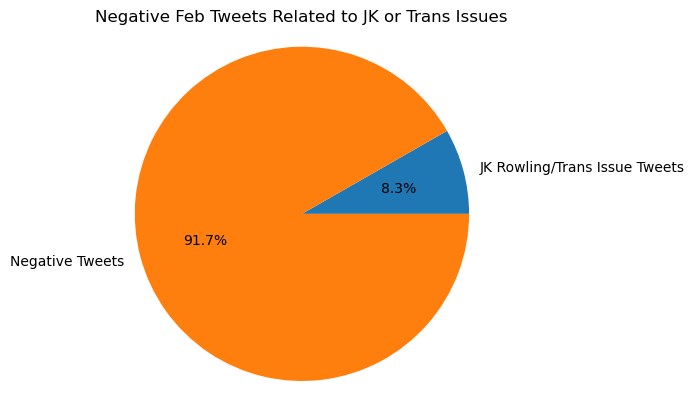

In [ ]:
# Pie chart representing the percentage

neg_count = [22, 244]
my_labels = 'JK Rowling/Trans Issue Tweets', 'Negative Tweets'
plt.pie(neg_count, labels=my_labels, autopct='%1.1f%%')
plt.title('Negative Feb Tweets Related to JK or Trans Issues')
plt.axis('equal')
plt.show()


### Negative Tweets from Dec Related to JK Rowling or Trans Issues

In [ ]:
# First make a new df conatian all negative rated Dec Tweets

dec_feb_twts = dec_tweets[dec_tweets['compound'] < 0]
dec_feb_twts

,tweet,neg,neu,pos,compound
7,@Raiders96PL @HogwartsLegacy @HogLegNews @Xpec...,0.210,0.790,0.000,-0.6115
34,RETWEET and leave your link if you’ll be strea...,0.118,0.882,0.000,-0.0516
36,Hogwarts Legacy - Official Dark Arts Battle Ar...,0.178,0.822,0.000,-0.3818
39,@HogwartsLegacy Bought the Digital Deluxe Edit...,0.127,0.873,0.000,-0.2584
45,"@FREDYSSAOR @HogwartsLegacy ""If you already ow...",0.061,0.939,0.000,-0.2960
...,...,...,...,...,...
992,@fartdirector_ @NRprops @HogwartsLegacy @Avala...,0.072,0.928,0.000,-0.3595
996,@Dubbalos4Life @KalosKaiAgathia @HogwartsLegac...,0.186,0.814,0.000,-0.8047
997,@jessiegender Fuck off. Boys have penis and gi...,0.258,0.625,0.117,-0.5267
999,@HogwartsLegacy @AvalancheWB @wbgames That mea...,0.266,0.734,0.000,-0.6908


In [ ]:
# join the keywords to df and extract tweets that conatain them

list_df_dec = dec_feb_twts[dec_feb_twts['tweet'].str.contains('|'.join(keywords), na=False, case=False)]

In [ ]:
list_df_dec.shape

(11, 5)

In [ ]:
list_df_dec.head(20)

,tweet,neg,neu,pos,compound
173,"Okay. I'm part of the LGBTQ+ community (BT), a...",0.139,0.687,0.174,-0.0915
259,I was going to pre-order @HogwartsLegacy \nBut...,0.176,0.727,0.097,-0.4917
262,It's quite depressing to see so many streamers...,0.206,0.747,0.047,-0.7158
332,"Hogwart's Legacy soon, can't wait, don't let t...",0.208,0.667,0.125,-0.2505
406,#HogwartsLegacy I'm a Democrat and I'm also si...,0.277,0.723,0.000,-0.8940
511,@jk_rowling is the queen of my childhood. If a...,0.121,0.818,0.061,-0.3182
596,And here I thought women supported each other....,0.166,0.744,0.090,-0.4479
691,@NayceGerhard @PS5_Gaymer @HogwartsLegacy @Ava...,0.244,0.642,0.115,-0.7677
764,Looking forward to #HogwartsLegacy I'm going t...,0.168,0.683,0.149,-0.0772
868,@PS5_Gaymer @HogwartsLegacy @AvalancheWB @wbga...,0.115,0.845,0.040,-0.6901


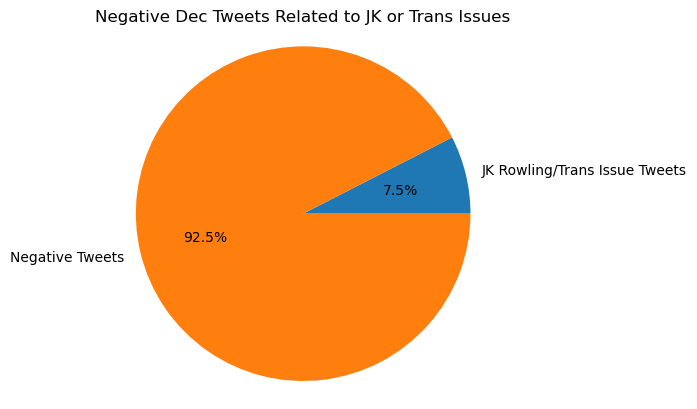

In [ ]:
neg_count_dec = [11, 135]
my_labels = 'JK Rowling/Trans Issue Tweets', 'Negative Tweets'
plt.pie(neg_count_dec, labels=my_labels, autopct='%1.1f%%')
plt.title('Negative Dec Tweets Related to JK or Trans Issues')
plt.axis('equal')
plt.show()